Import data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import math

Generate data

In [15]:
def generate_data(X, Y, size, iter):
    np.random.seed(iter)
    for i in range(size):
        
        y = np.random.randint(0, 2)

        if y == 1:
            Y.append([y])
            mean = [3, 2]
            cov = [[0.4, 0], [0, 0.4]]
        else:#用y=0代表y=-1
            Y.append([y-1])
            mean = [5, 0]
            cov = [[0.6, 0], [0, 0.6]]
        
        xi = np.random.multivariate_normal(mean, cov, 1)
        Xi = np.array([1])
        Xi = np.append(Xi, xi)
        X.append(Xi)


9

the median of Ein: 0.1960551435603019


Text(0, 0.5, 'number of Ein')

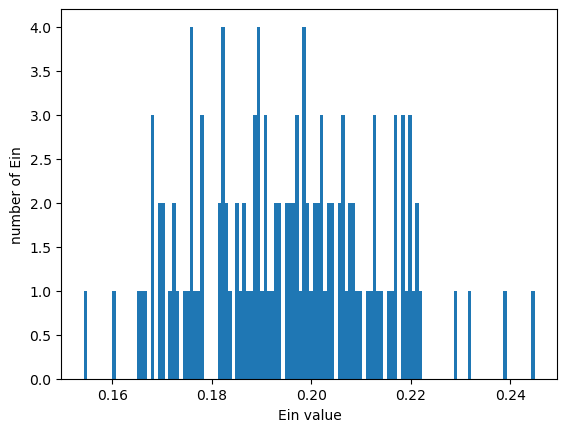

In [16]:
iteration = 128
train_size = 256
Einlist = []

for iter in range(iteration):
    train_x = []
    train_y = []
    generate_data(train_x, train_y, train_size, iter)
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    #Calculate pseudo-inverse
    train_x_dagger = np.linalg.pinv(train_x)
    #calculate wLIN
    wLIN = np.matmul(train_x_dagger, train_y)
    
    EinN = 0
    #calculate Ein
    for i in range(train_size):
        h_xn = np.matmul(wLIN.T, train_x[i])

        EinN += math.pow(h_xn - train_y[i], 2)
    Ein = EinN / train_size
    Einlist.append(Ein)
    


median = np.median(np.array(Einlist))
print('the median of Ein:', median)

plt.hist(Einlist, bins=128)
plt.xlabel('Ein value')
plt.ylabel('number of Ein')


10

the median of Ein: 0.01953125


Text(0, 0.5, 'number of Ein')

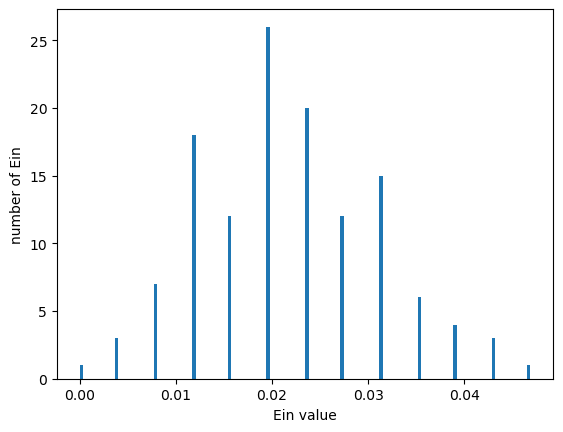

In [17]:
iteration = 128
train_size = 256
Einlist = []

for iter in range(iteration):
    train_x = []
    train_y = []
    generate_data(train_x, train_y, train_size, iter)
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)

    train_x_dagger = np.linalg.pinv(train_x)

    wLIN = np.matmul(train_x_dagger, train_y)

    EinN = 0

    for i in range(train_size):
        h_xn = np.matmul(wLIN.T, train_x[i])
        if np.sign(h_xn) != train_y[i]:
            EinN += 1
    
    Ein = EinN / train_size
    Einlist.append(Ein)
    


median = np.median(np.array(Einlist))
print('the median of Ein:', median)

plt.hist(Einlist, bins=128)
plt.xlabel('Ein value')
plt.ylabel('number of Ein')

11

the median of Eout of A Linear regression algorithm: 0.02392578125
the median of Eout of B Logistic regression algorithm 0.0350341796875


Text(0, 0.5, 'B Logistic regression algorithm Eout')

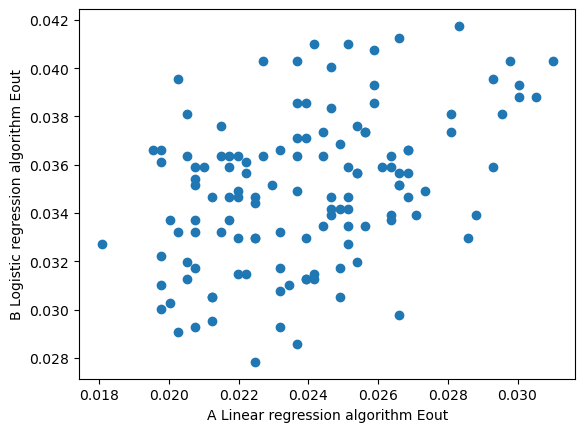

In [18]:
iteration = 128
train_size = 256
test_size = 4096
EoutLINlist = []
EoutLOGlist = []

for iter in range(iteration):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    generate_data(train_x, train_y, train_size, iter)
    generate_data(test_x, test_y, test_size, iter)
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)
    #Linear Reg.
    train_x_dagger = np.linalg.pinv(train_x)

    wLIN = np.matmul(train_x_dagger, train_y)

    EoutN = 0

    for i in range(test_size):
        h_xn = np.matmul(wLIN.T, test_x[i])
        if np.sign(h_xn) != test_y[i]:
            EoutN += 1
    
    Eout = EoutN / test_size
    EoutLINlist.append(Eout)

    #Logistic Reg.
    T = 500
    eta = 0.1
    W = np.zeros(3)

    for i in range(T):
        GDN = 0
        #Gradient Decent
        for j in range(train_size):
            s = -train_y[j] * np.matmul(W.T, train_x[j])
            theta = np.exp(s) / (1 + np.exp(s))
            GDN += theta * -train_y[j] * train_x[j]
        
        GD = GDN / train_size
        #update wt+1
        W = W - (eta * GD)

    EoutN = 0
    l = []
    for i in range(test_size):
        h_xn = np.matmul(W.T, test_x[i])
        if np.sign(h_xn) != test_y[i]:
            EoutN += 1

    Eout = EoutN / test_size
    EoutLOGlist.append(Eout)

median_A = np.median(np.array(EoutLINlist))
median_B = np.median(np.array(EoutLOGlist))
print('the median of Eout of A Linear regression algorithm:', median_A)
print('the median of Eout of B Logistic regression algorithm', median_B)

plt.scatter(EoutLINlist, EoutLOGlist)
plt.xlabel('A Linear regression algorithm Eout')
plt.ylabel('B Logistic regression algorithm Eout')

    

Generate outliner

In [19]:
def outliner(X, Y, size, iter):
    np.random.seed(iter)
    for i in range(size):
        Y.append([1])
        mean = [0, 6]
        cov = [[0.1, 0], [0, 0.3]]

        xi = np.random.multivariate_normal(mean, cov, 1)
        Xi = np.array([1])
        Xi = np.append(Xi, xi)
        X.append(Xi)


12

the median of Eout of A Linear regression algorithm: 0.028076171875
the median of Eout of B Logistic regression algorithm 0.034912109375


Text(0, 0.5, 'B Logistic regression algorithm Eout')

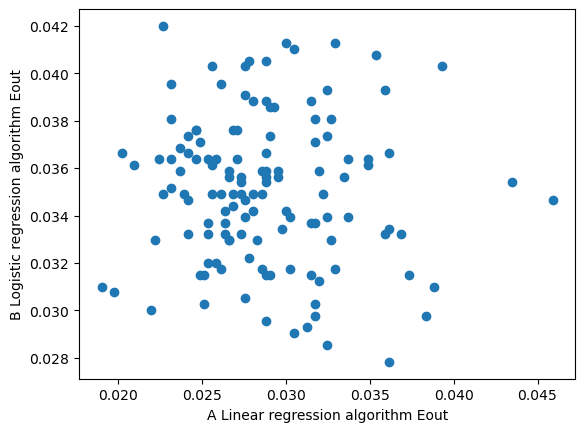

In [20]:
iteration = 128
train_size = 256
test_size = 4096
outliner_size = 16
EoutLINlist = []
EoutLOGlist = []

for iter in range(iteration):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    generate_data(train_x, train_y, train_size, iter)
    outliner(train_x, train_y, outliner_size, iter)
    generate_data(test_x, test_y, test_size, iter)
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)
    #Linear Reg.
    train_x_dagger = np.linalg.pinv(train_x)

    wLIN = np.matmul(train_x_dagger, train_y)

    EoutN = 0

    for i in range(test_size):
        h_xn = np.matmul(wLIN.T, test_x[i])
        if np.sign(h_xn) != test_y[i]:
            EoutN += 1
    
    Eout = EoutN / test_size
    EoutLINlist.append(Eout)

    #Logistic Reg.
    T = 500
    eta = 0.1
    W = np.zeros(3)

    for i in range(T):
        GDN = 0
        #Gradient Decent
        for j in range(train_size + outliner_size):
            s = -train_y[j] * np.matmul(W.T, train_x[j])
            theta = np.exp(s) / (1 + np.exp(s))
            GDN += theta * -train_y[j] * train_x[j]
        
        GD = GDN / (train_size + outliner_size)
        #update wt+1
        W = W - (eta * GD)

    EoutN = 0
    l = []
    for i in range(test_size):
        h_xn = np.matmul(W.T, test_x[i])
        if np.sign(h_xn) != test_y[i]:
            EoutN += 1

    Eout = EoutN / test_size
    EoutLOGlist.append(Eout)

median_A = np.median(np.array(EoutLINlist))
median_B = np.median(np.array(EoutLOGlist))
print('the median of Eout of A Linear regression algorithm:', median_A)
print('the median of Eout of B Logistic regression algorithm', median_B)

plt.scatter(EoutLINlist, EoutLOGlist)
plt.xlabel('A Linear regression algorithm Eout')
plt.ylabel('B Logistic regression algorithm Eout')